# Mie Theory

In this work, we implement the Mie Theory to obtain the emissivity of silica spheres.

## General Imports & functions

In [1]:
# Libraries needed to import for this example

import numpy as np                    # Basic numerical python library
import matplotlib.pyplot as plt       # Plotting library for python

from scipy.special import jv, yv, hankel1 # Bessel functions

# Silica permittivity

real_epsilon_SiO2 = np.genfromtxt('Datasets/epsilon_real_SiO2.dat') # Real part of silica permittivity
imag_epsilon_SiO2 = np.genfromtxt('Datasets/epsilon_imag_SiO2.dat') # Imaginary part of silica permittivity

wSiO2_raw = real_epsilon_SiO2[:,0]/(6.58*10**(-16)*10**14) # Sampling frequencies for silica permittivity raw, 10^14 rad/s
eps_SiO2_raw = real_epsilon_SiO2[:,1]+1j*imag_epsilon_SiO2[:,1] # Full silica permittivity raw

wSiO2 = np.linspace(0.2,3,200) # Sampling frequencies for silica permittivity, 10^14 rad/s
eps_SiO2 = np.interp(wSiO2,wSiO2_raw,eps_SiO2_raw) # Full silica permittivity

## Mie code

In [2]:
# Defining the external functions

def psi_f(n,z):
    
    return np.sqrt(np.pi*z/2)*jv(n+1/2,z)

def xi_f(n,z):
    
    return -np.sqrt(np.pi*z/2)*yv(n+1/2,z)

def ZZ_f(n,z):
    
    return psi_f(n,z)-1j*xi_f(n,z)#np.sqrt(np.pi*z/2)*hankel1(n+1/2,z)

def psi_f_der(n,z):
    
    return (psi_f(n,z+eps_tiny)-psi_f(n,z-eps_tiny))/(2*eps_tiny)

def xi_f_der(n,z):
    
    return (xi_f(n,z+eps_tiny)-xi_f(n,z-eps_tiny))/(2*eps_tiny)

def ZZ_f_der(n,z):
    
    return (ZZ_f(n,z+eps_tiny)-ZZ_f(n,z-eps_tiny))/(2*eps_tiny)#psi_f_der(n,z)+1j*xi_f_der(n,z)#(ZZ_f(n,z+eps_tiny)-ZZ_f(n,z-eps_tiny))/(2*eps_tiny)

In [4]:
# Inputs

R = 0.01 # Sphere radius, in microns
N = 1    # Number of terms to consider in the sum

# Pre-allocations and Constants

N_w = np.shape(wSiO2)[0] # Number of frequency points

emiss = np.zeros((N_w,),dtype='complex') # Array to store the emission efficiency

eps_tiny = 10**(-6)*(1+1j)
c = 3*10**8

# Mie calculations

for i in range(N_w):
    
    a_term = np.zeros((N,),dtype='complex') # Array to store the a terms
    b_term = np.zeros((N,),dtype='complex') # Array to store the b terms

    m = np.sqrt(eps_SiO2[i]) # Refraction index
    x = R*10**(-6)*(wSiO2[i]*10**14)/c # Ratio circumference and wavelength, k*R
    y = m*x 
    
    for j in range(N):
        
        a_term[j] = (psi_f_der(j,y)*psi_f(j,x)-m*psi_f(j,y)*psi_f_der(j,x))/(psi_f_der(j,y)*ZZ_f(j,x)-m*psi_f(j,y)*ZZ_f_der(j,x))
        b_term[j] = (m*psi_f_der(j,y)*psi_f(j,x)-psi_f(j,y)*psi_f_der(j,x))/(m*psi_f_der(j,y)*ZZ_f(j,x)-psi_f(j,y)*ZZ_f_der(j,x))
        
    Q_ext = 0 # Extinction efficiency
    Q_sca = 0 # Scattering efficiency
    
    for j in range(N):
        
        Q_ext = Q_ext + (2/x**2)*(2*j+1)*np.real(a_term[j]+b_term[j])
        Q_sca = Q_sca + (2/x**2)*(2*j+1)*(np.abs(a_term[j])**2+np.abs(b_term[j])**2)
    
    emiss[i] = Q_ext - Q_sca; # Emissivity, Q_emiss = Q_abs
    
plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(wSiO2,-emiss)
axs.set_ylabel('$\\vert a \\vert$, $\\vert b \\vert$', fontsize = 20)
#axs.set_ysacale('log')
axs.set_xlabel('N term', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['$\\vert a \\vert$', '$\\vert b \\vert$'], loc='upper right', fontsize = 20)
#fig.savefig('Mie_example.png', format='png', dpi=600)
plt.show()

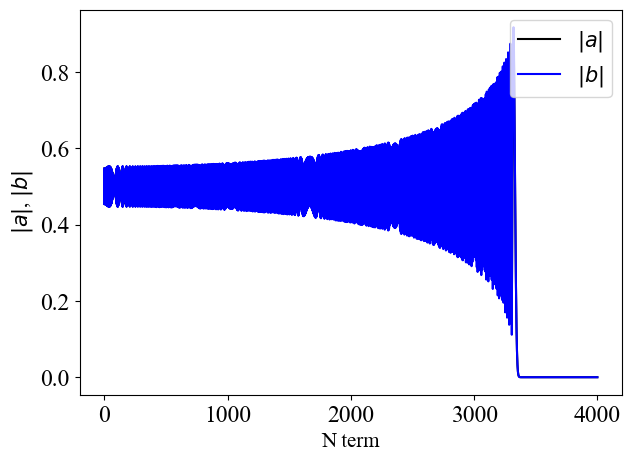

In [102]:
# Inputs

R = 5000 # Sphere radius, in microns
N = 4000 # Number of terms to consider in the sum

# Pre-allocations and Constants

N_w = np.shape(wSiO2)[0] # Number of frequency points

emiss = np.zeros((N_w,),dtype='complex') # Array to store the emission efficiency

eps_tiny = 10**(-6)*(1+1j)
c = 3*10**8

# Mie calculations

a_term = np.zeros((N,),dtype='complex') # Array to store the a terms
b_term = np.zeros((N,),dtype='complex') # Array to store the b terms

x = 3333 # Ratio circumference and wavelength, k*R
y = 6565 + 57.12j 
    
for j in range(N):
        
    a_term[j] = (psi_f_der(j,y)*psi_f(j,x)-m*psi_f(j,y)*psi_f_der(j,x))/(psi_f_der(j,y)*ZZ_f(j,x)-m*psi_f(j,y)*ZZ_f_der(j,x))
    b_term[j] = (m*psi_f_der(j,y)*psi_f(j,x)-psi_f(j,y)*psi_f_der(j,x))/(m*psi_f_der(j,y)*ZZ_f(j,x)-psi_f(j,y)*ZZ_f_der(j,x))

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.plot(np.abs(a_term),color='black')
axs.plot(np.abs(b_term),color='blue')
axs.set_ylabel('$\\vert a \\vert$, $\\vert b \\vert$', fontsize = 20)
axs.set_xlabel('N term', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['$\\vert a \\vert$', '$\\vert b \\vert$'], loc='upper right', fontsize = 20)
fig.savefig('Mie_3000.png', format='png', dpi=600)
plt.show()

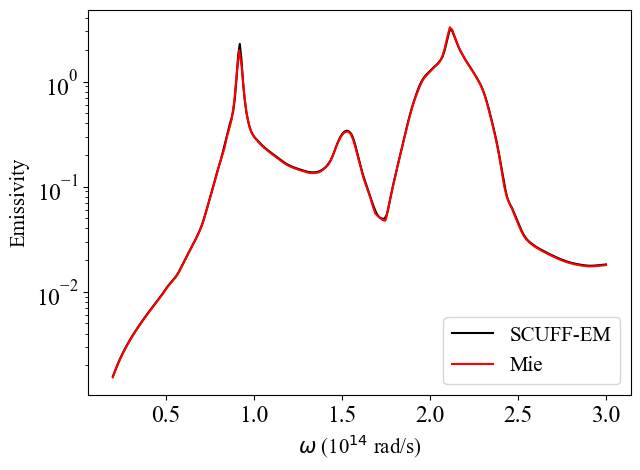

In [3]:
# Mie vs SCUFF-EM, SCUFF-NEQ

aer = np.genfromtxt('SCUFF_EM/Sphere_flux')
Mie = np.genfromtxt('Datasets/Mie_data.dat')

x_sc =  aer[:,1]*3
x_m = np.linspace(0.2,3,Mie.shape[1])

y_sc = np.zeros((aer.shape[0],))

for i in range(aer.shape[0]):
    
    y_sc[i] = (4*np.pi**2*(3*10**8)**2*aer[i,4])/((x_sc[i]*10**14)**2*4*np.pi*(10**(-6))**2)

plt.rcParams['font.family'] = ['Times New Roman']
fig,axs = plt.subplots(1,1,figsize=(7,5))
axs.semilogy(x_sc,y_sc,color='black')
axs.semilogy(x_m,Mie[44,:],color='red')
axs.set_ylabel('Emissivity', fontsize = 20)
axs.set_xlabel('$\omega$ (10$^{14}$ rad/s)', fontsize = 20)
axs.tick_params(axis='both', labelsize = 20)
axs.legend(['SCUFF-EM','Mie'], loc='lower right', fontsize = 20)
fig.savefig('SCUFF_vs_Mie.png', format='png', dpi=600)
plt.show()